# **Projeto Analytics**
## **ANALISE DE MICRODADOS ENEM 2021**

## **Importar os dados**

In [1]:
# libs ncessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importar a base
Base_Dados = pd.read_csv('MICRODADOS_ENEM_2021.csv',sep=';', encoding= 'ISO-8859-1' )

In [3]:
Base_Dados.dropna(how='any')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,"2,10052E+11",2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,"2,10051E+11",2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
33,"2,10053E+11",2021,3,M,1,1,1,2,0,2,...,A,A,A,B,A,A,C,A,B,B
45,"2,10053E+11",2021,4,F,1,3,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B
51,"2,10051E+11",2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048551,"2,10052E+11",2021,3,M,1,3,1,2,0,2,...,B,A,A,B,A,A,C,A,B,B
1048552,"2,10052E+11",2021,3,M,1,1,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B
1048554,"2,10054E+11",2021,3,M,1,1,1,2,0,3,...,B,B,B,B,A,B,E,B,D,B
1048558,"2,10054E+11",2021,3,F,1,3,2,2,0,2,...,A,A,A,B,B,A,C,A,B,B


In [4]:
Colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
           'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'
            ]

In [5]:
Base_Dados = Base_Dados.filter(items=Colunas)

In [6]:
Base_Dados = Base_Dados.dropna()

In [7]:
Base_Dados.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1,505.9,551.8,498.3,461.5,120.0,120.0,120.0,120.0,80.0,560.0
3,580.7,678.9,638.9,659.5,120.0,180.0,120.0,200.0,160.0,780.0
4,497.7,532.4,457.6,582.6,120.0,140.0,160.0,180.0,180.0,780.0
8,487.4,476.5,450.7,493.4,120.0,120.0,80.0,100.0,100.0,520.0
9,507.6,539.2,494.6,413.3,80.0,120.0,80.0,80.0,20.0,380.0


In [8]:
# Colunas
Base_Dados.columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO'],
      dtype='object')

In [9]:
# Tradução
Colunas_Traduzida = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
           'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'
    ]

In [10]:
# Renomar as colinas
Base_Dados.columns = Colunas_Traduzida

# Verificando
Base_Dados.head(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1,505.9,551.8,498.3,461.5,120.0,120.0,120.0,120.0,80.0,560.0
3,580.7,678.9,638.9,659.5,120.0,180.0,120.0,200.0,160.0,780.0
4,497.7,532.4,457.6,582.6,120.0,140.0,160.0,180.0,180.0,780.0
8,487.4,476.5,450.7,493.4,120.0,120.0,80.0,100.0,100.0,520.0
9,507.6,539.2,494.6,413.3,80.0,120.0,80.0,80.0,20.0,380.0
10,650.9,617.9,631.7,796.7,180.0,200.0,200.0,200.0,200.0,980.0
11,378.5,502.7,487.7,514.9,160.0,140.0,140.0,120.0,120.0,680.0
12,537.6,476.5,553.2,509.7,100.0,120.0,120.0,120.0,100.0,560.0
15,462.2,402.2,403.3,445.8,80.0,160.0,80.0,100.0,120.0,540.0
16,487.9,419.9,488.2,553.1,140.0,120.0,140.0,160.0,160.0,720.0


In [11]:
# Dimensão
Base_Dados.shape

(778968, 10)

In [12]:
# Infor
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778968 entries, 1 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_NOTA_CN       778968 non-null  float64
 1   NU_NOTA_CH       778968 non-null  float64
 2   NU_NOTA_LC       778968 non-null  float64
 3   NU_NOTA_MT       778968 non-null  float64
 4   NU_NOTA_COMP1    778968 non-null  float64
 5   NU_NOTA_COMP2    778968 non-null  float64
 6   NU_NOTA_COMP3    778968 non-null  float64
 7   NU_NOTA_COMP4    778968 non-null  float64
 8   NU_NOTA_COMP5    778968 non-null  float64
 9   NU_NOTA_REDACAO  778968 non-null  float64
dtypes: float64(10)
memory usage: 65.4 MB


In [13]:
# Analise Nulos
Base_Dados.isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

In [14]:
# estatística descritiva
Base_Dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,778968.0,488.322539,80.776262,0.0,427.7,476.7,540.4,867.1
NU_NOTA_CH,778968.0,521.559648,93.839385,0.0,447.9,522.4,589.1,846.9
NU_NOTA_LC,778968.0,502.894612,78.022975,0.0,448.1,505.2,558.0,813.2
NU_NOTA_MT,778968.0,531.036687,109.844722,0.0,442.0,508.8,606.5,953.1
NU_NOTA_COMP1,778968.0,122.099624,32.272857,0.0,100.0,120.0,140.0,200.0
NU_NOTA_COMP2,778968.0,143.619430,44.353137,0.0,120.0,120.0,180.0,200.0
NU_NOTA_COMP3,778968.0,119.194396,35.252223,0.0,100.0,120.0,140.0,200.0
NU_NOTA_COMP4,778968.0,132.848179,37.891032,0.0,120.0,120.0,160.0,200.0
NU_NOTA_COMP5,778968.0,120.368590,59.124662,0.0,80.0,120.0,160.0,200.0
NU_NOTA_REDACAO,778968.0,638.130218,185.084496,0.0,540.0,620.0,780.0,1000.0


In [15]:
# Unicos
Base_Dados.nunique()

NU_NOTA_CN         4605
NU_NOTA_CH         4706
NU_NOTA_LC         4567
NU_NOTA_MT         5677
NU_NOTA_COMP1        11
NU_NOTA_COMP2        10
NU_NOTA_COMP3        11
NU_NOTA_COMP4        11
NU_NOTA_COMP5        11
NU_NOTA_REDACAO      50
dtype: int64

## **Análise de Correlação**

A correlação pode ser medida usando o coeficiente de correlação, como o coeficiente de correlação de Pearson, que varia de -1 a 1, indicando uma relação negativa perfeita, nenhuma relação e uma relação positiva perfeita, respectivamente.

Uma forte correlação positiva entre as variáveis independentes e a variável dependente indica que as variáveis independentes estão altamente associadas à variável dependente e são úteis na previsão da variável dependente. Por outro lado, uma correlação fraca ou negativa indica que as variáveis independentes não estão relacionadas ou têm uma relação inversa com a variável dependente, e podem não ser úteis na previsão.

No entanto, a correlação não implica causalidade e não deve ser interpretada como tal. É importante também avaliar outros aspectos do modelo, como a significância estatística das variáveis independentes, a multicolinearidade e a adequação do modelo aos dados.

In [16]:
Base_Dados.corr()[['NU_NOTA_MT', 'NU_NOTA_REDACAO']]

,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,0.684464,0.492882
NU_NOTA_CH,0.638654,0.515136
NU_NOTA_LC,0.638886,0.535125
NU_NOTA_MT,1.000000,0.508627
NU_NOTA_COMP1,0.455061,0.854319
NU_NOTA_COMP2,0.421783,0.888448
NU_NOTA_COMP3,0.463350,0.912298
NU_NOTA_COMP4,0.467206,0.911421
NU_NOTA_COMP5,0.451730,0.869561
NU_NOTA_REDACAO,0.508627,1.000000


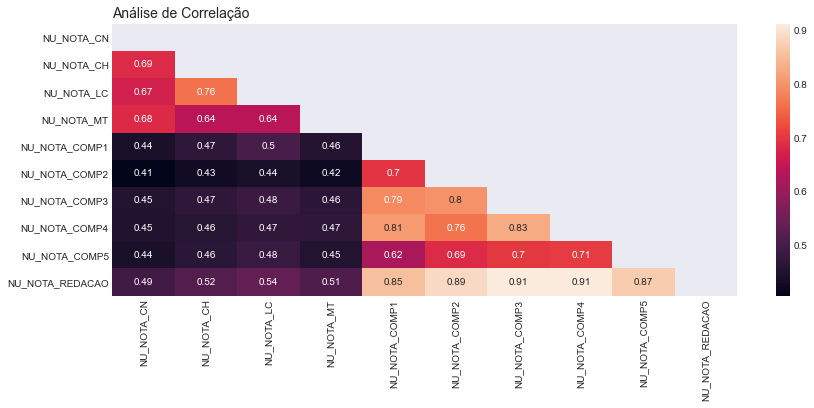

In [17]:

# Analise da correlação
Correlacao = Base_Dados.corr()

# Tamanho da imagem
plt.figure( figsize=(14, 5) )

# Estilo
plt.style.use('seaborn-dark')

# Titulo
plt.title('Análise de Correlação', fontsize=14, loc='left')

sns.heatmap( 
    Correlacao,
    annot=True,
    annot_kws={'fontsize': '10'},
    mask = np.triu( np.ones_like( Correlacao, dtype=bool) )
    );

## **Separação dos dados**

**Caracteristicas**: Dados que compoe 
<br>
**Previsor**: Variavel que quer prever

In [18]:
# Separando entre Caracteristicas e Previsao
Eixo_x = Base_Dados.drop( ['NU_NOTA_REDACAO'], axis=1 )
Eixo_y = Base_Dados['NU_NOTA_MT']

# Dimensao
Eixo_x.shape, Eixo_y.shape

((778968, 9), (778968,))

## **Divisão dos dados de treino e teste**

Função: **train_test_split()**
<br>
A divisão é feita usando a função train_test_split() que é importada da biblioteca sklearn.model_selection.

Os parâmetros que são passados para a função train_test_split() são:

**Eixo_x**: o conjunto de dados a ser dividido em dados de treinamento e teste para o eixo x.
<br><br>
**Eixo_y**: o conjunto de dados a ser dividido em dados de treinamento e teste para o eixo y.
<br><br>
**test_size**: o tamanho do conjunto de dados de teste. Neste caso, é definido como 0,20, o que significa que 20% dos dados serão usados como conjunto de teste e os 80% restantes serão usados como conjunto de treinamento.
<br><br>
**random_state**: é um número inteiro que é usado para inicializar o gerador de números aleatórios que é usado na divisão dos dados. Especificar um valor para random_state garante que a divisão dos dados seja sempre a mesma, o que é útil para fins de reprodução.

In [19]:
# Importar
from sklearn.model_selection import train_test_split

# Fazer a sepação
x_treino, x_teste, y_treino, y_teste = train_test_split(
    Eixo_x,
    Eixo_y,
    test_size=0.20,
    random_state=10
)

# Dimensao
print('Divisao dos nossos dados')
print( '-' * 50 )

print('< Atividade >')
print('Vamos treinar nosso algortimo')
print( x_treino.shape, y_treino.shape )

print( '-' * 50 )
print('< Prova >')
print('Vamos testar nosso algortimo')
print( x_teste.shape, y_teste.shape )

Divisao dos nossos dados
--------------------------------------------------
< Atividade >
Vamos treinar nosso algortimo
(623174, 9) (623174,)
--------------------------------------------------
< Prova >
Vamos testar nosso algortimo
(155794, 9) (155794,)


## **Treinamento do Modelo de Machine Learning**

## **Gerando as previsões**

Precisamos criar as previsões para comparar com o valore real

In [20]:
# Funçao da Regressão Linear ( Aprendizado de máquina ) -- Algoritmo/Calculos/Estatistica
from sklearn.linear_model import LinearRegression

In [21]:

# Instanciando o algortimo
Funcao_Regressao = LinearRegression()

In [22]:
# O método fit é uma função que usamos em modelos de 
# aprendizado de máquina para "ensinar" o modelo a fazer previsões 
# com base em dados de treinamento.
Funcao_Regressao.fit( x_treino, y_treino )

LinearRegression()

In [23]:
# Criar as previsões
Previsoes = Funcao_Regressao.predict( x_teste )

In [24]:
x_teste.head(5)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
672983,479.3,600.1,546.5,616.4,100.0,160.0,160.0,160.0,140.0
896388,400.8,404.8,402.3,566.9,100.0,120.0,80.0,100.0,40.0
181430,514.1,506.0,492.4,495.6,100.0,160.0,120.0,120.0,140.0
609724,362.1,496.8,335.4,378.8,100.0,120.0,120.0,120.0,0.0
720463,437.8,572.7,459.2,448.9,100.0,140.0,80.0,100.0,100.0


In [25]:
Previsoes[0:5]

array([616.4, 566.9, 495.6, 378.8, 448.9])

In [26]:
y_teste[0:5].values

array([616.4, 566.9, 495.6, 378.8, 448.9])

In [31]:
# Selecione apenas os recursos do conjunto de teste
x_teste = Base_Dados.drop('NU_NOTA_REDACAO', axis=1).head(1)

# Adicione a coluna 'NU_NOTA_MT' ao conjunto de teste
x_teste['NU_NOTA_MT'] = 0

# Faça a previsão usando o conjunto de teste
previsao = Funcao_Regressao.predict(x_teste)

In [32]:
Base_Dados.head(5)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1,505.9,551.8,498.3,461.5,120.0,120.0,120.0,120.0,80.0,560.0
3,580.7,678.9,638.9,659.5,120.0,180.0,120.0,200.0,160.0,780.0
4,497.7,532.4,457.6,582.6,120.0,140.0,160.0,180.0,180.0,780.0
8,487.4,476.5,450.7,493.4,120.0,120.0,80.0,100.0,100.0,520.0
9,507.6,539.2,494.6,413.3,80.0,120.0,80.0,80.0,20.0,380.0


## **Avaliar as métricas de erro**

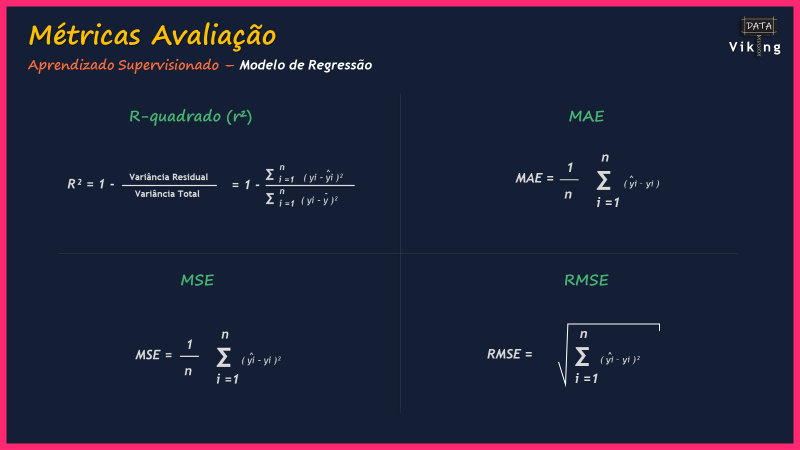

### **r²**

O r², também chamado de coeficiente de determinação, é uma medida de quão bem os dados se ajustam a uma linha ou curva de regressão. Ele representa a proporção da variância total na variável dependente que é explicada pela variável independente(s) incluída(s) no modelo de regressão.

O valor do r² **varia de 0 a 1**, sendo que um **valor de 1 indica que a linha ou curva de regressão se ajusta perfeitamente aos dados**, explicando toda a variância na variável dependente. Por outro lado, um valor de **0 indica que o modelo de regressão não explica nenhuma variância na variável dependente**.

In [33]:
# Funçção do r²
from sklearn.metrics import r2_score

r2 = r2_score( y_teste, Previsoes )
print('r²:', r2 )

r²: 1.0


### **MAE**

MAE (Mean Absolute Error) é uma métrica comumente utilizada para avaliar a qualidade de modelos de regressão. Ele mede a média das diferenças absolutas entre as previsões do modelo e os valores observados.

O cálculo do MAE é simples: para cada valor observado yi e valor previsto ŷi, calcula-se a diferença absoluta |yi - ŷi| e, em seguida, faz-se a média dessas diferenças absolutas para obter o MAE

In [34]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error( y_teste, Previsoes )
print('mae:', mae )

mae: 9.060925671463043e-14


### **MSE**

O MSE (Mean Squared Error) é uma métrica de erro comumente usada em modelos de previsão ou regressão. Ele mede a média dos erros quadrados entre as previsões e os valores reais.

O MSE é uma métrica útil porque fornece uma medida precisa da magnitude do erro em relação aos valores reais. No entanto, assim como o RMSE e o MAPE, o MSE pode ser afetado por valores extremos ou discrepantes nos dados. Além disso, como o MSE é uma métrica quadrática, ele pode ser difícil de interpretar diretamente em termos de unidades de medida originais dos dados.

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error( y_teste, Previsoes )
print('mse:', mse )

mse: 1.5011142625860552e-26


### **RMSE**

O RMSE (Root Mean Squared Error) é outra métrica usada para avaliar a precisão de modelos de previsão ou regressão. O RMSE é calculado como a raiz quadrada da média dos erros quadrados entre as previsões e os valores reais.

O RMSE é uma medida útil de erro porque penaliza mais os erros maiores, o que significa que ele fornece uma ideia mais precisa da magnitude dos erros em relação aos valores reais. No entanto, assim como o MAPE, o RMSE pode ser afetado por valores extremos e pode ser enganoso se houver valores extremos ou discrepantes nos dados.

In [36]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error( y_teste, Previsoes, squared=False )
print('rmse:', rmse )

rmse: 1.2251996827399424e-13


### **MAPE**

O MAPE (Mean Absolute Percentage Error) é uma métrica usada para avaliar a precisão de modelos de previsão ou regressão. Ele mede a porcentagem média do erro absoluto em relação aos valores reais.

O MAPE é uma métrica útil porque fornece uma medida da magnitude do erro em relação ao tamanho real da amostra, o que facilita a comparação entre diferentes conjuntos de dados.

In [37]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error( y_teste, Previsoes) * 100
print('mape:', mape )

mape: 43.86634611290099


In [38]:
# Avaliar todas as métricas

Dicionario = {
    'R²' : r2,
    'MAE' : mae,
    'MSE' : mse,
    'RMSE' : rmse,
    'MAPE' : mape
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={ 0 : 'Valor da métrica'} )

,Valor da métrica
R²,1.000000e+00
MAE,9.060926e-14
MSE,1.501114e-26
RMSE,1.225200e-13
MAPE,4.386635e+01


**R²:** O valor de 0.907566 indica que o modelo explica 90,76% da variabilidade dos dados, o que é considerado um bom ajuste do modelo.

**MAE:** O valor de 166.520426 indica que, em média, as previsões do modelo têm um erro absoluto médio de 166,52 unidades em relação aos valores reais.



MSE: O valor de 46739.599764 indica que, em média, as previsões do modelo têm um erro quadrático médio de 46739,60 unidades em relação aos valores reais.



**RMSE**: O valor de 216.193431 indica que, em média, as previsões do modelo têm um erro médio quadrático de 216,19 unidades em relação aos valores reais. O RMSE é a raiz quadrada do MSE, o que significa que o RMSE fornece uma medida de erro mais interpretável, em unidades das variáveis originais.



**MAPE:** O valor de 7.164499 indica que, em média, as previsões do modelo têm um erro percentual absoluto médio de 7,16% em relação aos valores reais.

